# Importing the required **libraries**

In [1]:
!pip install gradio transformers datasets soundfile safetensors arabert fsspec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.4/321.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.8 MB/s eta 0:00:00
   ━━

In [2]:
import tensorflow as tf
import time
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import time
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import *
from tensorflow.python.client import device_lib
import numpy as np
import re
from tensorflow.keras.models import load_model
import sys
import string
import nltk
from nltk.stem.isri import ISRIStemmer
import os
import pandas as pd
from tabulate import tabulate


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Train Data**

In [3]:
from datasets import load_dataset
import pandas as pd
from tabulate import tabulate

def truncate_text(text, max_length=50):
    return (text[:max_length] + '...') if len(text) > max_length else text

ds = load_dataset("XA7/AraSpell")

df = ds['train'].to_pandas()

print("Dataset: XA7/AraSpell")
print("-" * 50)
print(df)



print(f"Total number of samples: {len(df)}")

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(tabulate(missing_values.to_frame(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

print("\nUnique values in each column:")
print(tabulate(df.nunique().to_frame(), headers=['Column', 'Unique Values'], tablefmt='pretty'))

print("\n" + "=" * 50 + "\n")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


dataset (3).parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15001 [00:00<?, ? examples/s]

Dataset: XA7/AraSpell
--------------------------------------------------
                                                   clean  \
0      ولدت هذه الأميرة بنبوءة أيضا والتي تقضي أنها س...   
1      من المهم أيضا معرفة ما إذا كانت الخزانة متوافق...   
2      عمل كل من والدي تشانغ كمبرمجين للكمبيوتر في الصين   
3                          ويصعد إليها عن طريق درجات سلم   
4                            تدل على الأقاليم الخاضعة له   
...                                                  ...   
14996         وهاجم منها المدن والقرى الحضرمية في الداخل   
14997  وتخلق هذه الاستراتيجية حالة معينة تجبر وتشجع ا...   
14998  كما لديها العديد من الأقسام المختلفة والتي يلت...   
14999  هاجر شرايير مع زوجته وابنته إلى البرازيل حيث أ...   
15000  كما أن الهواء داخل البنية سيكون مشبعا ببخار الماء   

                                          distorted_0.05  
0      ولدت هذه الأميةر بنبوءة أيضا والتي تقضي أنها س...  
1      من المهم أضا معرفة ما إذ اكانت الخزانة متوافقة مع  
2      لعم كل من والدي تشانغ 

## **Cleaning and processing Functions**

In [4]:
import re
from nltk.corpus import stopwords

# 1. Function to remove numbers
def remove_numbers(text):
    """Remove all numeric characters from the text."""
    return re.sub(r'\d+', '', text)

# 2. Function to remove extra spaces
def remove_extra_spaces(text):
    """Remove extra spaces and trim the text."""
    return re.sub(r'\s+', ' ', text).strip()

# 3. Function to remove special characters
def remove_special_characters(text):
    """Remove special characters except alphanumeric and spaces."""
    return re.sub(r'[^\w\s]', '', text)

# 4. Function to remove diacritics (Tashkeel)
def remove_tashkeel(text):
    """Remove basic diacritics."""
    return re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)

# 5. Function to remove additional diacritics
def remove_additional_diacritics(text):
    """Remove additional diacritics (e.g., elongation marks)."""
    return re.sub(r'[\u0653-\u0655\u0670]', '', text)

# 6. Function to normalize Alef and Yaa
def normalize_alef_yaa(text):
    """Normalize alef variations and yaa."""
    text = re.sub(r'أ|إ|آ', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    return text

# 8. Function to remove emojis
def remove_emojis(text):
    """Remove emoji characters from the text."""
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emojis
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# 9. Function to remove English words
# Advanced function to remove English words
def remove_english_words(text):
    """
    Remove all words containing Latin characters, including usernames.
    """
    return re.sub(r'\b[A-Za-z0-9_]+\b', '', text)

# 10. Function to normalize dialect variants
def normalize_dialect_variants(text):
    """Normalize common dialectal variants to standard forms."""
    text = re.sub(r'گ', 'ق', text)  # Normalize 'گ' to 'ق'
    text = re.sub(r'چ', 'ك', text)  # Normalize 'چ' to 'ك'
    text = re.sub(r'ڤ', 'ف', text)  # Normalize 'ڤ' to 'ف'
    return text

# 11. Function to normalize repeated characters
def normalize_repeated_characters(text):
    """Reduce repeated characters to two occurrences."""
    return re.sub(r'(.)\1+', r'\1\1', text)

# 12. Function to remove URLs and mentions
def remove_urls_mentions(text):
    """Remove URLs and mentions from the text."""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    return text

# General function to apply the cleaning pipeline
def clean_text_pipeline(text, functions):
    """
    Apply a list of cleaning functions to the text in the given order.
    :param text: The input text string.
    :param functions: List of function names as strings to apply.
    :return: Cleaned text.
    """
    for func_name in functions:
        func = globals().get(func_name)
        if callable(func):
            text = func(text)
        else:
            print(f"Warning: {func_name} is not a valid function.")
    return text

# **Cleaning and processing the Train datasets**

In [5]:
ds = load_dataset("XA7/AraSpell")
df = ds['train'].to_pandas()

cleaning_functions = [
    'remove_numbers',
    'remove_extra_spaces',
    'remove_special_characters',
    'remove_tashkeel',
    'remove_additional_diacritics',
    'normalize_alef_yaa',
    'remove_emojis',
    'remove_english_words',
    'normalize_dialect_variants',
    'normalize_repeated_characters',
    'remove_urls_mentions'
]

df['clean'] = df['clean'].apply(lambda x: clean_text_pipeline(x, cleaning_functions))
df['distorted_0.05'] = df['distorted_0.05'].apply(lambda x: clean_text_pipeline(x, cleaning_functions))

CLEANED_CSV_PATH = '/content/drive/My Drive/Colab Notebooks/NLP_Project/Dataset/XA7_AraSpell_cleaned.csv'
df.to_csv(CLEANED_CSV_PATH, index=False)

print(f"Cleaned data saved to: {CLEANED_CSV_PATH}")

df = pd.read_csv(CLEANED_CSV_PATH)

print(f"File: {CLEANED_CSV_PATH}")
print("-" * 50)

df_display = df.head(10).copy()
for col in df_display.columns:
    if df_display[col].dtype == 'object':
        df_display[col] = df_display[col].apply(lambda x: (x[:50] + '...') if len(x) > 50 else x)

print("First 10 rows:")
print(df)
print("\n")

print(f"Total number of samples: {len(df)}")

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(tabulate(missing_values.to_frame(), headers=['Column', 'Missing Values'], tablefmt='pretty'))

print("\nUnique values in each column:")
print(tabulate(df.nunique().to_frame(), headers=['Column', 'Unique Values'], tablefmt='pretty'))

print("\n" + "=" * 50 + "\n")

Cleaned data saved to: /content/drive/My Drive/Colab Notebooks/NLP_Project/Dataset/XA7_AraSpell_cleaned.csv
File: /content/drive/My Drive/Colab Notebooks/NLP_Project/Dataset/XA7_AraSpell_cleaned.csv
--------------------------------------------------
First 10 rows:
                                                   clean  \
0      ولدت هذه الاميرة بنبوءة ايضا والتي تقضي انها س...   
1      من المهم ايضا معرفة ما اذا كانت الخزانة متوافق...   
2      عمل كل من والدي تشانغ كمبرمجين للكمبيوتر في الصين   
3                          ويصعد اليها عن طريق درجات سلم   
4                            تدل علي الاقاليم الخاضعة له   
...                                                  ...   
14996         وهاجم منها المدن والقري الحضرمية في الداخل   
14997  وتخلق هذه الاستراتيجية حالة معينة تجبر وتشجع ا...   
14998  كما لديها العديد من الاقسام المختلفة والتي يلت...   
14999  هاجر شرايير مع زوجته وابنته الي البرازيل حيث ا...   
15000  كما ان الهواء داخل البنية سيكون مشبعا ببخار الماء   

              

# **Adding More Distortions**

In [6]:
import random
import pandas as pd

def add_more_errors(text, error_rate=0.1):

    text = list(text)
    for i in range(len(text)):
        if random.random() < error_rate:
            text[i] = random.choice('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
    return ''.join(text)

df['distorted_0.10'] = df['distorted_0.05'].apply(lambda x: add_more_errors(x, error_rate=0.10))

print(df[['clean', 'distorted_0.05', 'distorted_0.10']].head(10))

                                               clean  \
0  ولدت هذه الاميرة بنبوءة ايضا والتي تقضي انها س...   
1  من المهم ايضا معرفة ما اذا كانت الخزانة متوافق...   
2  عمل كل من والدي تشانغ كمبرمجين للكمبيوتر في الصين   
3                      ويصعد اليها عن طريق درجات سلم   
4                        تدل علي الاقاليم الخاضعة له   
5                   ان الاخر هو الذي يجعلني اعي ذاتي   
6                       سمير فرج مدير التصوير مونتاج   
7      لجنة الانواع الباقية المجموعة المتخصصة بالقطط   
8                   نباتات وصفها سبنسر لي مارشنت مور   
9  يمكن لمغايري النوع الاجتماعي الذين يعتبرون لا ...   

                                      distorted_0.05  \
0  ولدت هذه الاميةر بنبوءة ايضا والتي تقضي انها س...   
1  من المهم اضا معرفة ما اذ اكانت الخزانة متوافقة مع   
2  لعم كل من والدي تشانغ كمبرمجين للكمبيوتر في الصين   
3                      ويصعد اليها عن طريق درجات سلح   
4                        تدل علي الاقاليم ارخاضعة له   
5                  ان الاخنر هو الذي يجعلني اعي

# **Splitting the data into training, evaluation, and testing.**

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df, test_size=0.2, random_state=42)

df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Test set size: {len(df_test)}")

print("\nTraining set:")
print(df_train.head())

print("\nValidation set:")
print(df_val.head())

print("\nTest set:")
print(df_test.head())

Training set size: 12000
Validation set size: 1500
Test set size: 1501

Training set:
                                                  clean  \
9840     الافراج عن المعتقلين السياسيين من جميع الاحزاب   
9386                    باول ويست هو كاتب وشاعر بريطاني   
6560  الجزء الاول من التسمية كفر في اللغة السريانية ...   
3402                           ليلة اول جمعة من شهر رجب   
820     جبة البقاربالباء بدل النون وبضم الجيم بدل كسرها   

                                         distorted_0.05  \
9840      الافراج نع المعقلين السياسيين من جميع الاحزاب   
9386                    باول ويست هو كاتب وشاعر بريطناي   
6560  الجزء الاول من بالتسمية كرف ضفي اللغة السرياني...   
3402                            ليلةاول جمعة من شهر رجب   
820     جبة اةلبقاربالباء بدل النون وبضم الجيم بدل كسها   

                                         distorted_0.10  
9840      الافراج نع المعقلبد الضياسيين من جميع الاحزاب  
9386                    باول ويست هو كاتب وشازر بريطناي  
6560  الجزء الادل من طالتسمية 

# **Fine Tuning LLM using coda Dataset**

In [8]:
from huggingface_hub import login
login()

# **Loading the model and the tokenizer.**

In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("CAMeL-Lab/arabart-qalb15-gec-ged-13")
model = AutoModelForSeq2SeqLM.from_pretrained("CAMeL-Lab/arabart-qalb15-gec-ged-13")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.78M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/557M [00:00<?, ?B/s]

Some weights of the model checkpoint at CAMeL-Lab/arabart-qalb15-gec-ged-13 were not used when initializing MBartForConditionalGeneration: ['model.encoder.embed_ged_tags.weight']
- This IS expected if you are initializing MBartForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing MBartForConditionalGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **Trainable Model Parameters**

In [11]:
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(model))

trainable model parameters: 139221504
all model parameters: 139221504
percentage of trainable model parameters: 100.00%


# **Zero-Shot Text Correction: Model vs Human**

In [ ]:
df_test

In [12]:
index = 4976

clean_text = df_train.loc[index, 'clean']
distorted_5 = df_train.loc[index, 'distorted_0.05']

prompt = f"""
صحح الجملة التالية:

{incorrect_text}

الجملة المصححة:


"""

inputs = tokenizer(prompt, return_tensors='pt')
output = tokenizer.decode(
    model.generate(
        inputs["input_ids"],
        max_new_tokens=200,
    )[0],
    skip_special_tokens=True
)

dash_line = '-'.join('' for x in range(100))
print(dash_line)
print(f'INPUT PROMPT:\n{prompt}')
print(dash_line)
print(f'BASELINE HUMAN Correction:\n{clean_text}\n')
print(dash_line)
print(f'MODEL GENERATION - ZERO SHOT:\n{output}')

---------------------------------------------------------------------------------------------------
INPUT PROMPT:

صحح الجملة التالية:

اي ان الخدعة استخدمت اسما مشتقا مه الصيغة ابكيميائية واة كان هذاس الاسم غير متداول

الجملة المصححة:



---------------------------------------------------------------------------------------------------
BASELINE HUMAN Correction:
اي ان الخدعة استخدمت اسما مشتقا من الصيغة الكيميائية وان كان هذا الاسم غير متداول

---------------------------------------------------------------------------------------------------
MODEL GENERATION - ZERO SHOT:
صحح الجملة التالية : أي إن الخدعة استخدمت اسما مشتقا من الصيغة الكيميائية ، وإذا كان هذا الاسم غير متداول الجملة المصححة :


# **Tokenizing Text Data for Correction Model Training**

In [13]:
from datasets import Dataset
def tokenize_function(example):
    start_prompt = 'صحح الجملة التالية:\n\n'
    end_prompt = '\n\nالجملة المصححة: '
    prompt = [start_prompt + incorrect + end_prompt for incorrect in example['distorted_0.05']]

    max_length = 128

    example['input_ids'] = tokenizer(
        prompt,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    ).input_ids

    example['labels'] = tokenizer(
        example["clean"],
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    ).input_ids

    return example

train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)


tokenized_train_datasets = train_dataset.map(tokenize_function, batched=True)
tokenized_val_datasets = val_dataset.map(tokenize_function, batched=True)
tokenized_test_datasets = test_dataset.map(tokenize_function, batched=True)


tokenized_train_datasets = tokenized_train_datasets.remove_columns(['distorted_0.05', 'clean'])
tokenized_val_datasets = tokenized_val_datasets.remove_columns(['distorted_0.05', 'clean'])
tokenized_test_datasets = test_dataset.remove_columns(['distorted_0.05', 'clean'])

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1501 [00:00<?, ? examples/s]

In [14]:
tokenized_train_datasets = tokenized_train_datasets.filter(lambda example, index: index % 100 == 0, with_indices=True)
tokenized_val_datasets = tokenized_val_datasets.filter(lambda example, index: index % 100 == 0, with_indices=True)
tokenized_test_datasets = tokenized_test_datasets.filter(lambda example, index: index % 100 == 0, with_indices=True)

Filter:   0%|          | 0/12000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1501 [00:00<?, ? examples/s]

In [15]:
print(f"Shapes of the datasets:")
print(f"Training: {tokenized_train_datasets.shape}")
print(f"Training: {tokenized_val_datasets.shape}")
print(f"Training: {tokenized_val_datasets.shape}")

Shapes of the datasets:
Training: (120, 4)
Training: (15, 4)
Training: (15, 4)


# **Training for Arabic Text Correction Model**

In [16]:
import time
from transformers import TrainingArguments, Trainer

output_dir = f'./Arabic-checker-{str(int(time.time()))}'

training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_steps=1,
    max_steps=10,
    report_to="none"

)

trainer = Trainer(
    model= model,
    args=training_args,
    train_dataset = tokenized_train_datasets,
    eval_dataset = tokenized_val_datasets

)

In [17]:
trainer.train()

Step,Training Loss
1,20.891800
2,17.553800
3,15.459000
4,14.564900
5,13.457400
6,12.907100
7,12.667800
8,12.063100
9,11.781100
10,11.890400


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=10, training_loss=14.323632526397706, metrics={'train_runtime': 371.4478, 'train_samples_per_second': 0.215, 'train_steps_per_second': 0.027, 'total_flos': 6097553326080.0, 'train_loss': 14.323632526397706, 'epoch': 0.6666666666666666})

In [18]:
model_save_path = "/content/drive/MyDrive/Training_model"
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f" {model_save_path}")

 /content/drive/MyDrive/Training_model


In [19]:
model_save_path = "/content/drive/MyDrive/Training_model"
instruct_model = AutoModelForSeq2SeqLM.from_pretrained(model_save_path)
instruct_tokenizer = AutoTokenizer.from_pretrained(model_save_path)

In [50]:
df_test.shape

(1501, 3)

In [53]:
from transformers import GenerationConfig
import pandas as pd
from sklearn.metrics import accuracy_score
from nltk.translate.bleu_score import sentence_bleu

clean_texts = df_test['clean'].head(100)
distorted_texts = df_test['distorted_0.05'].head(100)

original_model_corrections = []
instruct_model_corrections = []

for distorted_text in distorted_texts:
    prompt = f"""
صحح الجملة التالية:

{distorted_text}

الجملة المصححة:
"""
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids

    original_model_outputs = model.generate(
        input_ids=input_ids,
        generation_config=GenerationConfig(max_new_tokens=200)
    )
    original_model_text_output = tokenizer.decode(original_model_outputs[0], skip_special_tokens=True)
    original_model_corrections.append(original_model_text_output)

    instruct_model_outputs = instruct_model.generate(
        input_ids=input_ids,
        generation_config=GenerationConfig(max_new_tokens=200)
    )
    instruct_model_text_output = tokenizer.decode(instruct_model_outputs[0], skip_special_tokens=True)
    instruct_model_corrections.append(instruct_model_text_output)

results_df = pd.DataFrame({
    'clean_text': clean_texts,
    'distorted_text': distorted_texts,
    'original_model_correction': original_model_corrections,
    'instruct_model_correction': instruct_model_corrections
})


print(results_df)


                                              clean_text  \
10826  كانت هذه اول اغنية التي جلبتها شركة هيل اند را...   
4959                            يقع المطار بين بالانغا و   
10974  وكان ينزل منزل الشيخ محمد سرور يرحمه الله علي ...   
13569  الزيوت والصابون وغيرها من المصانع ذات الحجم ال...   
2133   الناس الان سوف يقومن بتشغيل الاخلاقية والتفكير...   
...                                                  ...   
2512                             بعد ان كانت دولة داخلية   
13315  كانت هارييت مثل والديها واشقائها ناشطة ضمن الج...   
6692   يعتبر الركض رياضة فعالة في زيادة عمر الانسان و...   
3128          وقد اقيم المضاف اليه المصدر مكان المضاف ذو   
113              يجاور في الغرب الباراغواي وبوليفيا ايضا   

                                          distorted_text  \
10826  كانت هذه اولاغنية التي جلبته شركة هيل اند رانج...   
4959                             يقع المطاربين بالانغا و   
10974  وان ينلز منزل الشيخ محمد سرور يرحمه الله علي ب...   
13569  الزيوت والصابون وغصرها م نالمصان

In [55]:
results_df

,clean_text,distorted_text,original_model_correction,instruct_model_correction
10826,كانت هذه اول اغنية التي جلبتها شركة هيل اند را...,كانت هذه اولاغنية التي جلبته شركة هيل اند رانج...,أصحح الجملة التالية : كانت هذه الأغنية التي جل...,تصحيح الجملة التالية : كانت هذه أولاغنية التي ...
4959,يقع المطار بين بالانغا و,يقع المطاربين بالانغا و,صحح الجملة التالية : يقع المطاربين بالانكليزية...,صحح الجملة التالية : يقع المطاربون بالانغا ، و...
10974,وكان ينزل منزل الشيخ محمد سرور يرحمه الله علي ...,وان ينلز منزل الشيخ محمد سرور يرحمه الله علي ب...,صحح الجملة التالية : وان نزل منزل الشيخ محمد س...,صحح الجملة التالية : وان ينزل منزل الشيخ محمد ...
13569,الزيوت والصابون وغيرها من المصانع ذات الحجم ال...,الزيوت والصابون وغصرها م نالمصانع ذات الحجم ال...,تصحيح الجملة التالية : الزيوت والصابون وخدمها ...,تصحيح الجملة التالية : الزيوت والصابون وغصرها ...
2133,الناس الان سوف يقومن بتشغيل الاخلاقية والتفكير...,الناس الان سوف يقومن بتشغيل الاخلاقية وةلتفير ...,صحح الجملة التالية : الناس الآن سوف يقومون بتش...,صحح الجملة التالية : الناس الآن سوف يقومون بتش...
...,...,...,...,...
2512,بعد ان كانت دولة داخلية,بعد ان كانت دوة داخلية,صحح الجملة التالية : بعد ان كانت آلة داخلية ال...,صحح الجملة التالية : بعد ان كانت جملة داخلية ،...
13315,كانت هارييت مثل والديها واشقائها ناشطة ضمن الج...,كانت هارييت مثل والديها واشقائها ناشطة ضمنا لج...,صحح الجملة التالية : كانت إليزابيث مثل والديها...,تصحيح الجملة التالية : كانت هارييت مثل والديها...
6692,يعتبر الركض رياضة فعالة في زيادة عمر الانسان و...,يعتبر الركض رياضة فعالةفي زيادة عمر للانسان وت...,صحح الجملة التالية : يعتبر الركض رياضة فعالة ف...,صحح الجملة التالية : يعتبر الركض رياضة فعالة ف...
3128,وقد اقيم المضاف اليه المصدر مكان المضاف ذو,وقد اقم المضاف اليه المصدر مكان المضفا ذو,صحح الجملة التالية : وقد أقم المضاف إليه المصد...,صحح الجملة التالية : وقد اقم المضاف إليه المصد...


In [64]:
from rouge import Rouge

# حساب Rouge Score
def calculate_rouge_score(clean_texts, corrections):
    if not isinstance(clean_texts, list):
        clean_texts = list(clean_texts)
    if not isinstance(corrections, list):
        corrections = list(corrections)

    clean_texts = [text for text in clean_texts if text.strip()]
    corrections = [text for text in corrections if text.strip()]

    assert len(clean_texts) == len(corrections), "الأطوال غير متساوية!"

    rouge = Rouge()
    scores = rouge.get_scores(corrections, clean_texts, avg=True)
    return scores

original_model_rouge = calculate_rouge_score(clean_texts, original_model_corrections)
instruct_model_rouge = calculate_rouge_score(clean_texts, instruct_model_corrections)

print("Original Model Rouge Scores:", original_model_rouge)
print("Instruct Model Rouge Scores:", instruct_model_rouge)

Original Model Rouge Scores: {'rouge-1': {'r': 0.6909615085636758, 'p': 0.40841529130297455, 'f': 0.5097429845336935}, 'rouge-2': {'r': 0.46702063120058485, 'p': 0.22403416703695342, 'f': 0.29871448200200346}, 'rouge-l': {'r': 0.6909615085636758, 'p': 0.40841529130297455, 'f': 0.5097429845336935}}
Instruct Model Rouge Scores: {'rouge-1': {'r': 0.7243821779785401, 'p': 0.43682237712408, 'f': 0.5416671573688339}, 'rouge-2': {'r': 0.5186461029510566, 'p': 0.2587769308525837, 'f': 0.3413638197461597}, 'rouge-l': {'r': 0.7243821779785401, 'p': 0.43682237712408, 'f': 0.5416671573688339}}


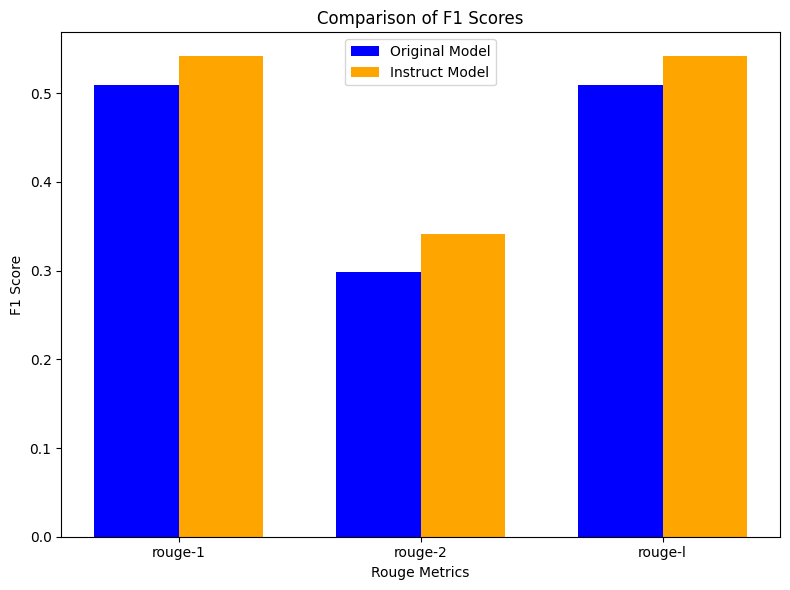

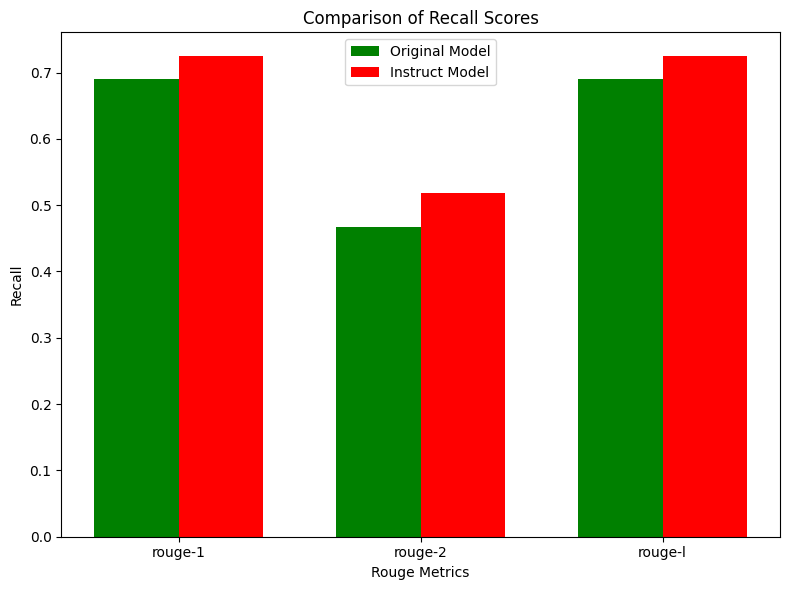

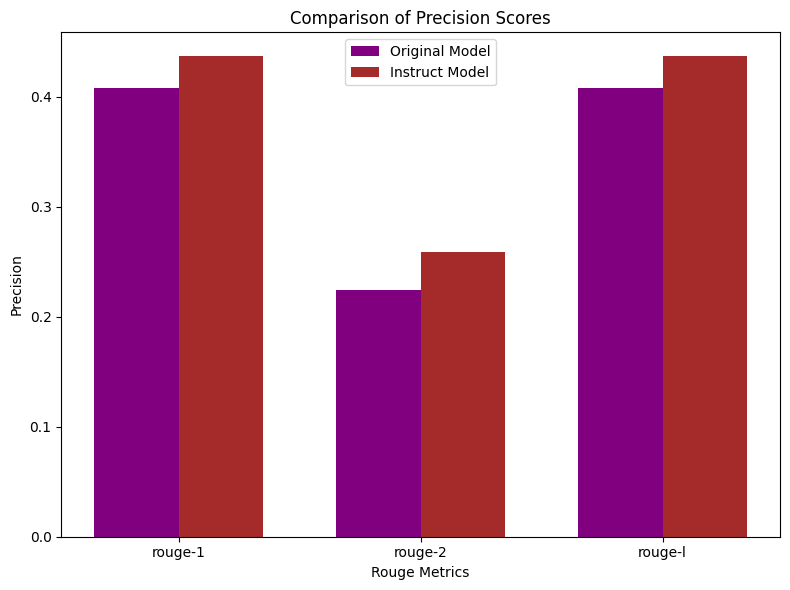

In [70]:

def plot_rouge_scores(original_scores, instruct_scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    original_f1 = [original_scores[metric]['f'] for metric in metrics]
    original_recall = [original_scores[metric]['r'] for metric in metrics]
    original_precision = [original_scores[metric]['p'] for metric in metrics]

    instruct_f1 = [instruct_scores[metric]['f'] for metric in metrics]
    instruct_recall = [instruct_scores[metric]['r'] for metric in metrics]
    instruct_precision = [instruct_scores[metric]['p'] for metric in metrics]

    x = np.arange(len(metrics))
    width = 0.35

    fig1, ax1 = plt.subplots(figsize=(8, 6))
    rects1 = ax1.bar(x - width/2, original_f1, width, label='Original Model', color='blue')
    rects2 = ax1.bar(x + width/2, instruct_f1, width, label='Instruct Model', color='orange')

    ax1.set_xlabel('Rouge Metrics')
    ax1.set_ylabel('F1 Score')
    ax1.set_title('Comparison of F1 Scores')
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics)
    ax1.legend()


    fig1.tight_layout()

    fig2, ax2 = plt.subplots(figsize=(8, 6))
    rects3 = ax2.bar(x - width/2, original_recall, width, label='Original Model', color='green')
    rects4 = ax2.bar(x + width/2, instruct_recall, width, label='Instruct Model', color='red')

    ax2.set_xlabel('Rouge Metrics')
    ax2.set_ylabel('Recall')
    ax2.set_title('Comparison of Recall Scores')
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics)
    ax2.legend()



    fig2.tight_layout()

    fig3, ax3 = plt.subplots(figsize=(8, 6))
    rects5 = ax3.bar(x - width/2, original_precision, width, label='Original Model', color='purple')
    rects6 = ax3.bar(x + width/2, instruct_precision, width, label='Instruct Model', color='brown')

    ax3.set_xlabel('Rouge Metrics')
    ax3.set_ylabel('Precision')
    ax3.set_title('Comparison of Precision Scores')
    ax3.set_xticks(x)
    ax3.set_xticklabels(metrics)
    ax3.legend()

    fig3.tight_layout()

    plt.show()

plot_rouge_scores(original_model_rouge, instruct_model_rouge)

# LSTM **Model**

# **Loading Data **

In [ ]:
FOLDER_PATH = '/content/drive/MyDrive/Colab Notebooks/NLP_Project/Dataset/News/News_dataset.clean'
# Pre-process data
data = open(FOLDER_PATH, encoding='utf-8').read()
corpus = data.lower().split("\n")
print("first article in the dataset",corpus[0])


first article in the dataset <s> ترى إحدى المحاكم أن الفقرة من المادة تسمح بإجراء تحقيق حول النية الذاتية للطرفين حتى


# Tokenization and Vocabulary Setup

In [ ]:

vocab_size = 100000
out_of_vocab = "<unk>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=out_of_vocab)
tokenizer.fit_on_texts(corpus)

# Generating Input Sequences for Language Modeling

In [ ]:
input_sequences = []
input_sequences_reversed = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        n_gram_sequence_rev = token_list[i:]
        n_gram_sequence_rev.reverse()
        input_sequences_reversed.append(n_gram_sequence_rev)

# Padding Sequences

In [ ]:
# Pad sequences
max_sequence_len = 15
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences_reversed = np.array(pad_sequences(input_sequences_reversed, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# Create predictors (words before and after) and label (current word)
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]
predictors_rev, label_rev = input_sequences_reversed[:,:-1], input_sequences_reversed[:,-1]

# Test - label must be the same as label_rev, i.e. the current word
print(predictors[1], label[1])
print(predictors_rev[1], label_rev[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   2 873] 1015
[    0    88 14024  5420  8837   263   179  2820  1675    89     4   102
     5  1843] 1015


# Building and Training a Neural Language Model with LSTM

In [ ]:
# Input
left_input = Input(shape=(max_sequence_len-1,), name="left_in")

# Embedding
left_features = Embedding(vocab_size, 128)(left_input)

# LSTM
left_features = LSTM(64)(left_features)

concat = concatenate([left_features], name='concatenate')

# Dense - output
pred = Dense(vocab_size, activation='softmax', name="pred")(concat)


model = Model(
    inputs = [left_input],
    outputs = pred
)


model.compile(
    optimizer = Adam(),
    loss = SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

print(model.summary())


my_callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3),
    ModelCheckpoint(filepath='model-dual-input/model.{epoch:02d}-{accuracy:.3f}-{val_accuracy:.3f}.keras', verbose=1)
]

start_time = time.time()
history = model.fit(
    {"left_in": predictors},
    {'pred': label},
    epochs=100,
    batch_size=512,
    validation_split=0.02,
    callbacks=my_callbacks
)
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

[  0   0   0   0   0   0   0   0   0   0   0   0   2 873] 1015
[   0   88    1 5420 8837  263  179 2820 1675   89    4  102    5 1843] 1015
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 left_in (InputLayer)        [(None, 14)]              0         
                                                                 
 embedding (Embedding)       (None, 14, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 concatenate (Concatenate)   (None, 64)                0         
                                                                 
 pred (Dense)                (None, 10000)             650000    
                                                                 
Total params: 1979408 (7.55 MB)
Trainable params: 197

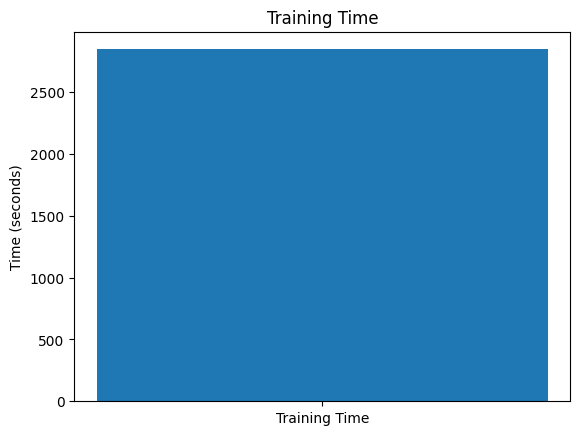

In [ ]:
import matplotlib.pyplot as plt

plt.bar(['Training Time'], [training_time])
plt.title('Training Time')
plt.ylabel('Time (seconds)')
plt.savefig('training_time_plot_without.png')
plt.show()

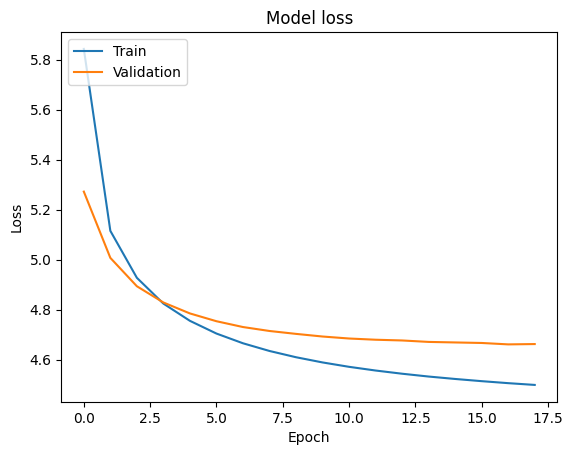

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('model_loss_plot.png')
plt.show()

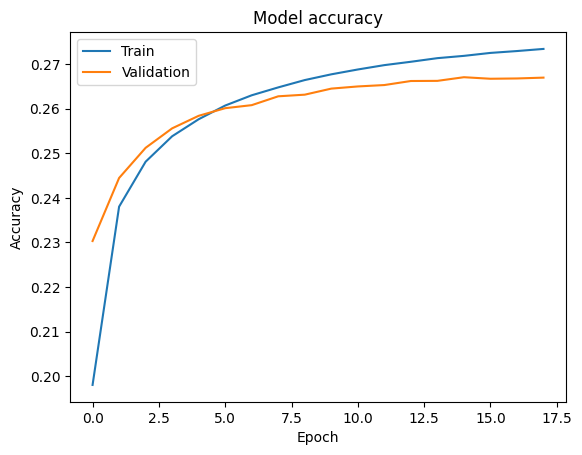

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('model_accuracy_plot.png')

plt.show()

pip install

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/NLP_Project/Models/model.03-0.176-0.179.keras')



# Test the correction
if __name__ == "__main__":
    # List of incorrect and expected corrected words
    test_words = [
        ("طاولؤة", "طاولة"),
        ("طاول ة", "طاولة"),
        ("شااي", "شاي"),
        ("كتااب", "كتاب"),
        ("قلمم", "قلم"),
        ("سكرر", "سكر"),
        ("كرسيي", "كرسي"),
        ("دفترر", "دفتر"),
        ("مقصص", "مقص"),
        ("صابونن", "صابون"),
        ("فرشاةة", "فرشاة"),
        ("مصباحح", "مصباح"),
        ("سجادةة", "سجادة"),
        ("زجاجةة", "زجاجة"),
        ("علبةة", "علبة"),
        ("شوكةة", "شوكة"),
        ("ملعقةة", "ملعقة"),
        ("صحنن", "صحن"),
        ("كوبب", "كوب"),
        ("طبقق", "طبق"),
        ("سكينن", "سكين"),
        ("منديلل", "منديل"),
        ("مكنسةة", "مكنسة"),
        ("مفرشش", "مفرش"),
        ("وسادةة", "وسادة"),
        ("بطانيةة", "بطانية"),
        ("مصففةة", "مصففة"),
        ("مشطط", "مشط"),
        ("مرآةة", "مرآة"),
        ("فرشش", "فرش"),
        ("لوحةة", "لوحة"),
        ("قارورةة", "قارورة"),
        ("زيتت", "زيت"),
        ("دقيقق", "دقيق"),
        ("سمنن", "سمن"),
        ("عسلل", "عسل"),
        ("خبزز", "خبز"),
        ("جبنن", "جبن"),
        ("لبنن", "لبن"),
        ("بيضض", "بيض"),
        ("لحمةة", "لحمة"),
        ("دجاجةة", "دجاجة"),
        ("سمكك", "سمك"),
        ("أرزز", "أرز"),
        ("عدسس", "عدس"),
        ("فولل", "فول"),
        ("حمصص", "حمص"),
        ("زيتونن", "زيتون"),
        ("خضارر", "خضار"),
        ("فاكهةة", "فاكهة"),
        ("تفاحةة", "تفاحة"),
        ("موزةة", "موزة"),
        ("برتقالل", "برتقال"),
        ("ليمونن", "ليمون"),
        ("فراولةة", "فراولة"),
        ("عنبةة", "عنبة"),
        ("خوخةة", "خوخة"),
        ("مشمشش", "مشمش"),
        ("دراقةة", "دراقة"),
        ("بطيخةة", "بطيخة"),
        ("شمامم", "شمام"),
        ("جزرر", "جزر"),
        ("بصلل", "بصل"),
        ("ثومم", "ثوم"),
        ("طماطمم", "طماطم"),
        ("خيارر", "خيار"),
        ("فلفلل", "فلفل"),
        ("بقدونسس", "بقدونس"),
        ("كزبرةة", "كزبرة"),
        ("نعنعع", "نعنع"),
        ("زعترر", "زعتر"),
        ("قرفةة", "قرفة"),
        ("هيلل", "هيل"),
        ("فانيلياا", "فانيليا"),
        ("شوكولاتةة", "شوكولاتة"),
        ("بسكويتت", "بسكويت"),
        ("كيكك", "كيك"),
        ("كعكةة", "كعكة"),
        ("حلوىى", "حلوى"),
        ("سكاكرر", "سكاكر"),
        ("شيبسس", "شيبس"),
        ("مشرووب", "مشروب"),
        ("عصيرر", "عصير"),
        ("ماءء", "ماء"),
        ("قهوةة", "قهوة"),
        ("شااي", "شاي"),
        ("ليمونادةة", "ليمونادة"),
        ("مشروباتات", "مشروبات"),
        ("معجونن", "معجون"),
        ("فر شاةة", "فرشاة"),
        ("معطرر", "معطر"),
        ("صابونن", "صابون"),
        ("شامبوو", "شامبو"),
        ("كريمم", "كريم"),
        ("لوشنن", "لوشن"),
        ("مزيلل", "مزيل"),
        ("عطرر", "عطر"),
    ]

    correct_count = 0  # Number of correctly corrected words
    total_words = len(test_words)  # Total number of words

    for incorrect_word, correct_word_expected in test_words:
        corrected_word = correct_word(incorrect_word)  # Correct the word
        print(f"Incorrect word: {incorrect_word}")
        print(f"Corrected word: {corrected_word}")

        if corrected_word == correct_word_expected:
            correct_count += 1  # Increment counter if the word is corrected correctly

        print("-" * 30)  # Separator between results

    # Calculate accuracy
    accuracy = (correct_count / total_words) * 100
    print(f"Number of correctly corrected words: {correct_count} out of {total_words}")
    print(f"Accuracy: {accuracy:.2f}%")



Incorrect word: طاولؤة
Corrected word: [('طاولة', 535)]
------------------------------
Incorrect word: طاول ة
Corrected word: [('طاولة', 535)]
------------------------------
Incorrect word: شااي
Corrected word: [('شاهي', 165), ('شادي', 87), ('شاي', 86), ('شاغي', 31), ('شاوي', 17)]
------------------------------
Incorrect word: كتااب
Corrected word: True
------------------------------
Incorrect word: قلمم
Corrected word: [('قلم', 257), ('قلما', 140), ('قلمه', 84), ('قمم', 62), ('قلمك', 26)]
------------------------------
Incorrect word: سكرر
Corrected word: [('سكر', 819), ('تكرر', 231), ('مكرر', 223), ('يكرر', 139), ('سكور', 98)]
------------------------------
Incorrect word: كرسيي
Corrected word: True
------------------------------
Incorrect word: دفترر
Corrected word: [('دفتر', 1066), ('دفتري', 15), ('دفتره', 8), ('دفترا', 6), ('دفترك', 2)]
------------------------------
Incorrect word: مقصص
Corrected word: [('قصص', 1639), ('مخصص', 298), ('وقصص', 130), ('بقصص', 89), ('مقص', 59)]
-----

# **Levenshtein Distance**

In [ ]:
import os
import re
import Levenshtein
import pandas as pd

FOLDER_PATH = '/content/drive/MyDrive/Colab Notebooks/NLP_Project/Dataset/jamid/jamid.csv'

def read_csv(file_path):
    return pd.read_csv(file_path, encoding='utf-8', delimiter='\t', on_bad_lines='skip')

def load_jamid_names():
    file_path = os.path.join(FOLDER_PATH)
    if os.path.exists(file_path):
        df = read_csv(file_path)
        print(f"File read: jamid.csv (Number of rows: {len(df)})")

        if "غير مشكول" in df.columns:
            jamid_names = df["غير مشكول"].dropna().unique()
            return set(jamid_names)
        else:
            print("Column 'غير مشكول' not found in the file.")
            return set()
    else:
        print("File jamid.csv not found in the directory.")
        return set()

jamid_names = load_jamid_names()

if jamid_names:
    print("Sample of jamid names:")
    for name in list(jamid_names)[:20]:
        print(name)
else:
    print("No jamid words loaded.")

def preprocess_arabic_word(word):
    word = re.sub(r'[\u064B-\u065F]', '', word)
    word = word.replace('أ', 'ا').replace('إ', 'ا').replace('آ', 'ا')
    return word

def correct_word(word, correct_words):
    word = preprocess_arabic_word(word)
    if word in correct_words:
        return word

    suggestions = []
    for correct_word in correct_words:
        clean_correct_word = preprocess_arabic_word(correct_word)
        distance = Levenshtein.distance(word, clean_correct_word)
        if distance <= 3:
            suggestions.append((correct_word, distance))

    if suggestions:
        suggestions.sort(key=lambda x: x[1])
        return suggestions[0][0]
    else:
        return word

File read: jamid.csv (Number of rows: 10257)
Sample of jamid names:
كوامخ
عوائد
براد
ثابتة
سواقي
ظلل
أنابيب
بنات
شفاطة
بعوث
قيوم
اختلاجة
برنامج
عجماء
مجدار
متاهة
رئة
مفاد
نوار
أسجاق


In [ ]:
# Load jamid names
correct_words = load_jamid_names()

# Test word correction
if correct_words:
    # List of incorrect and corrected words
    test_words = [
        ("طاولؤة", "طاولة"),
        ("طاول ة", "طاولة"),
        ("شااي", "شاي"),
        ("كتااب", "كتاب"),
        ("قلمم", "قلم"),
        ("سكرر", "سكر"),
        ("كرسيي", "كرسي"),
        ("دفترر", "دفتر"),
        ("مقصص", "مقص"),
        ("صابونن", "صابون"),
        ("فرشاةة", "فرشاة"),
        ("مصباحح", "مصباح"),
        ("سجادةة", "سجادة"),
        ("زجاجةة", "زجاجة"),
        ("علبةة", "علبة"),
        ("شوكةة", "شوكة"),
        ("ملعقةة", "ملعقة"),
        ("صحنن", "صحن"),
        ("كوبب", "كوب"),
        ("طبقق", "طبق"),
        ("سكينن", "سكين"),
        ("منديلل", "منديل"),
        ("مكنسةة", "مكنسة"),
        ("مفرشش", "مفرش"),
        ("وسادةة", "وسادة"),
        ("بطانيةة", "بطانية"),
        ("مصففةة", "مصففة"),
        ("مشطط", "مشط"),
        ("مرآةة", "مرآة"),
        ("فرشش", "فرش"),
        ("لوحةة", "لوحة"),
        ("قارورةة", "قارورة"),
        ("زيتت", "زيت"),
        ("دقيقق", "دقيق"),
        ("سمنن", "سمن"),
        ("عسلل", "عسل"),
        ("خبزز", "خبز"),
        ("جبنن", "جبن"),
        ("لبنن", "لبن"),
        ("بيضض", "بيض"),
        ("لحمةة", "لحمة"),
        ("دجاجةة", "دجاجة"),
        ("سمكك", "سمك"),
        ("أرزز", "أرز"),
        ("عدسس", "عدس"),
        ("فولل", "فول"),
        ("حمصص", "حمص"),
        ("زيتونن", "زيتون"),
        ("خضارر", "خضار"),
        ("فاكهةة", "فاكهة"),
        ("تفاحةة", "تفاحة"),
        ("موزةة", "موزة"),
        ("برتقالل", "برتقال"),
        ("ليمونن", "ليمون"),
        ("فراولةة", "فراولة"),
        ("عنبةة", "عنبة"),
        ("خوخةة", "خوخة"),
        ("مشمشش", "مشمش"),
        ("دراقةة", "دراقة"),
        ("بطيخةة", "بطيخة"),
        ("شمامم", "شمام"),
        ("جزرر", "جزر"),
        ("بصلل", "بصل"),
        ("ثومم", "ثوم"),
        ("طماطمم", "طماطم"),
        ("خيارر", "خيار"),
        ("فلفلل", "فلفل"),
        ("بقدونسس", "بقدونس"),
        ("كزبرةة", "كزبرة"),
        ("نعنعع", "نعنع"),
        ("زعترر", "زعتر"),
        ("قرفةة", "قرفة"),
        ("هيلل", "هيل"),
        ("فانيلياا", "فانيليا"),
        ("شوكولاتةة", "شوكولاتة"),
        ("بسكويتت", "بسكويت"),
        ("كيكك", "كيك"),
        ("كعكةة", "كعكة"),
        ("حلوىى", "حلوى"),
        ("سكاكرر", "سكاكر"),
        ("شيبسس", "شيبس"),
        ("مشرووب", "مشروب"),
        ("عصيرر", "عصير"),
        ("ماءء", "ماء"),
        ("قهوةة", "قهوة"),
        ("شااي", "شاي"),
        ("ليمونادةة", "ليمونادة"),
        ("مشروباتات", "مشروبات"),
        ("معجونن", "معجون"),
        ("فر شاةة", "فرشاة"),
        ("معطرر", "معطر"),
        ("صابونن", "صابون"),
        ("شامبوو", "شامبو"),
        ("كريمم", "كريم"),
        ("لوشنن", "لوشن"),
        ("مزيلل", "مزيل"),
        ("عطرر", "عطر"),
    ]

    correct_count = 0  # Number of correctly corrected words
    total_words = len(test_words)  # Total number of words

    for incorrect_word, correct_word_expected in test_words:
        corrected_word = correct_word(incorrect_word, correct_words)
        print(f"Incorrect word: {incorrect_word}")
        print(f"Corrected word: {corrected_word}")

        if corrected_word == correct_word_expected:
            correct_count += 1  # Increment counter if the word is corrected correctly

        print("-" * 30)  # Separator between results

    # Calculate accuracy
    accuracy = (correct_count / total_words) * 100
    print(f"Number of correctly corrected words: {correct_count} out of {total_words}")
    print(f"Accuracy: {accuracy:.2f}%")
else:
    print("No jamid words loaded.")

File read: jamid.csv (Number of rows: 10257)
Incorrect word: طاولؤة
Corrected word: طاولة
------------------------------
Incorrect word: طاول ة
Corrected word: طاولة
------------------------------
Incorrect word: شااي
Corrected word: شاي
------------------------------
Incorrect word: كتااب
Corrected word: كتائب
------------------------------
Incorrect word: قلمم
Corrected word: قمم
------------------------------
Incorrect word: سكرر
Corrected word: سكري
------------------------------
Incorrect word: كرسيي
Corrected word: كرسي
------------------------------
Incorrect word: دفترر
Corrected word: دفتر
------------------------------
Incorrect word: مقصص
Corrected word: مقصف
------------------------------
Incorrect word: صابونن
Corrected word: صابونة
------------------------------
Incorrect word: فرشاةة
Corrected word: فرشاة
------------------------------
Incorrect word: مصباحح
Corrected word: مصباح
------------------------------
Incorrect word: سجادةة
Corrected word: سجادة
----------------